In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from itertools import product
from multiprocessing import Pool
from pprint import pprint

## Generating random networks

### types of random network

![types of random networks](./attachments/networkx_random_vs_scalefree_smallworld.jpg)

### Random network (Erdos Renyi)

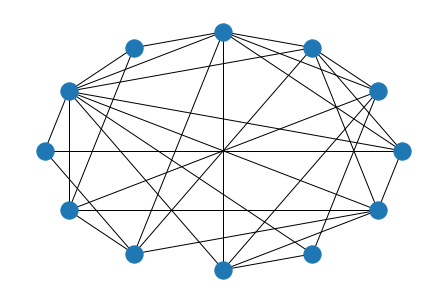

In [2]:
G1 = nx.erdos_renyi_graph(n=12, p=0.5)
nx.draw_circular(G1)

In [3]:
type(G1)

networkx.classes.graph.Graph

### Small World network (Watts Strogatz)

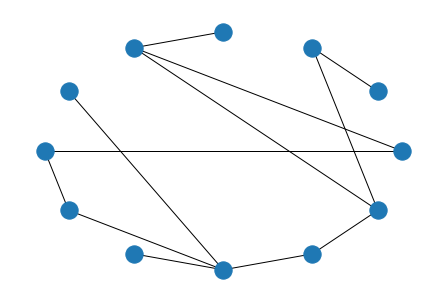

In [4]:
G2 = nx.watts_strogatz_graph(n=12, k=2 , p=1/2)
nx.draw_circular(G2)

### Random network (Barabasi Albert)

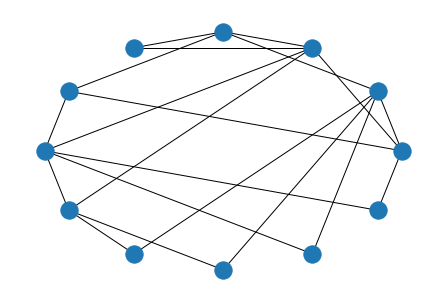

In [5]:
G3 = nx.barabasi_albert_graph(n=12, m=2)
nx.draw_circular(G3)

## Network metrics

In [6]:
from scripts.networkx_metrics import network_metrics

In [7]:
for G in [G1, G2, G3]:
    pprint(network_metrics(G))
    print("\n")

{'avg degree': 5.17,
 'avg distance': array([1.5606]),
 'degree distribution': array([0, 0, 0, 3, 0, 5, 2, 1, 0, 1]),
 'nb components': 1}


{'avg degree': 2.0,
 'avg distance': array([2.7576]),
 'degree distribution': array([0, 4, 5, 2, 1]),
 'nb components': 1}


{'avg degree': 3.33,
 'avg distance': array([1.8333]),
 'degree distribution': array([0, 0, 5, 1, 3, 3]),
 'nb components': 1}




## Generating random network with similar metrics

Generating different types of network given an expected average node degree

In [8]:
from scripts.networkx_random_graphs import generate_random_graph

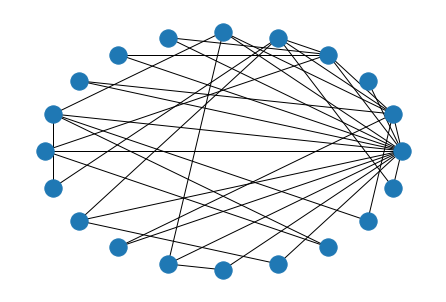

In [9]:
network_type = 'scale free' # ['random', 'small world', 'scale free']

mygraph = generate_random_graph(network_type=network_type, nb_nodes=20, avg_degree=4)
nx.draw_circular(mygraph)

In [10]:
pprint(network_metrics(mygraph))

{'avg degree': 3.6,
 'avg distance': array([1.9842]),
 'degree distribution': array([ 0,  1, 10,  3,  1,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1]),
 'nb components': 1}


<br>

Comparing different random graph for a fixed `(n, avg_degree)` parameters

{'avg degree': 7.32,
 'avg distance': array([2.5018]),
 'degree distribution': array([ 0,  0,  0,  3,  8, 11, 17, 21, 10, 13,  6,  6,  2,  2,  1]),
 'nb components': 1}


{'avg degree': 8.0,
 'avg distance': array([2.4523]),
 'degree distribution': array([ 0,  0,  0,  0,  0,  4, 15, 27, 22, 13, 11,  4,  1,  1,  1,  1]),
 'nb components': 1}


{'avg degree': 7.68,
 'avg distance': array([2.379]),
 'degree distribution': array([ 0,  0,  0,  1, 31, 20, 11,  7,  4,  3,  3,  3,  3,  1,  1,  1,  1,
        4,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  0,  1]),
 'nb components': 1}




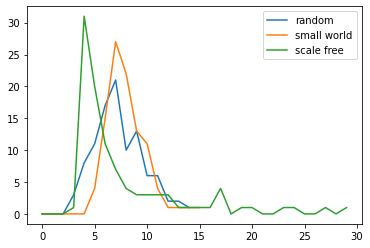

In [11]:
n = 100
expected_avg_degree = 8
network_types = ['random', 'small world', 'scale free']

for option in network_types:
    G = generate_random_graph(option, n, expected_avg_degree)
    pprint(network_metrics(G))   # show network metrics for each type of graph
    plt.plot(network_metrics(G)['degree distribution'], label=option)  # show degree distribution
    print("\n")
    
plt.legend(loc="upper right")

<br>

Comparing different random graph for multiple `(n, avg_degree)` parameters

In [236]:
network_types = ['random', 'small world', 'scale free']
nb_nodes = [100, 200]
# expected_avg_degree = np.arange(2,31,1).tolist()
expected_avg_degree = [4,5]

# generate all possible combination of above parameters
settings = list(product(network_types, nb_nodes, expected_avg_degree))

In [12]:
from scripts.networkx_metrics import network_metrics, avg_degree, avg_distance, degree_distribution, nb_components

def generate_graph_metadata(nx_type, N, k):
    G = generate_random_graph(nx_type, N, k)
    return (nx_type, N, k, avg_degree(G, decimals=2), degree_distribution(G), nb_components(G), avg_distance(G, decimals=2))

In [237]:
# (multiprocessing) generate graph metadata for all settings
p = Pool()
result = p.starmap(generate_graph_metadata, settings)
p.close()
p.join()

### Storing network metadata

as a `pandas.DataFrame`

In [238]:
df = pd.DataFrame(result, 
        columns=('graph_type', 
                'nb_nodes', 
                'expected_avg_degree',
                'avg_degree', 
                'degree_distribution', 
                'nb_components', 
                'avg_distance')
).set_index(['graph_type', 'nb_nodes', 'expected_avg_degree'])
df

avg_degree  \
graph_type  nb_nodes expected_avg_degree               
random      100      4                          3.82   
                     5                          5.88   
            200      4                          3.80   
                     5                          4.86   
small world 100      4                          4.00   
                     5                          4.00   
            200      4                          4.00   
                     5                          4.00   
scale free  100      4                          3.92   
                     5                          5.82   
            200      4                          3.96   
                     5                          5.91   

                                                                        degree_distribution  \
graph_type  nb_nodes expected_avg_degree                                                      
random      100      4                                 [2, 10, 16, 16, 22, 12, 13, 7, 1, 1]   
                     5                          [0, 0, 6, 8, 13, 22, 17, 11, 7, 8, 6, 1, 1]   
            200      4                                [6, 13, 40, 33, 42, 26, 20, 12, 6, 2]   
                     5                       [3, 7, 19, 31, 37, 26, 29, 25, 12, 5, 2, 2, 2]   
small world 100      4                                         [0, 0, 11, 26, 27, 27, 6, 3]   
                     5                                          [0, 0, 9, 31, 27, 22, 6, 5]   
            200      4                                     [0, 0, 21, 51, 65, 40, 18, 3, 2]   
                     5                                  [0, 0, 20, 47, 73, 38, 19, 2, 0, 1]   
scale free  100      4                    [0, 0, 50, 20, 7, 8, 4, 3, 0, 1, 1, 0, 1, 1, 0...   
                     5                    [0, 0, 0, 41, 16, 15, 3, 3, 4, 1, 4, 6, 2, 0, ...   
            200      4                    [0, 0, 99, 42, 20, 13, 4, 2, 5, 3, 3, 0, 0, 2,...   
                     5                    [0, 0, 0, 68, 53, 26, 9, 9, 6, 4, 0, 3, 5, 2, ...   

                                          nb_components  \
graph_type  nb_nodes expected_avg_degree                  
random      100      4                                3   
                     5                                1   
            200      4                                7   
                     5                                4   
small world 100      4                                1   
                     5                                1   
            200      4                                1   
                     5                                1   
scale free  100      4                                1   
                     5                                1   
            200      4                                1   
                     5                                1   

                                                                  avg_distance  
graph_type  nb_nodes expected_avg_degree                                        
random      100      4                                        [3.51, 0.0, 0.0]  
                     5                                                  [2.78]  
            200      4                    [4.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                     5                                   [3.46, 0.0, 0.0, 0.0]  
small world 100      4                                                  [3.59]  
                     5                                                  [3.54]  
            200      4                                                  [4.17]  
                     5                                                   [4.2]  
scale free  100      4                                                  [2.99]  
                     5                                                  [2.61]  
            200      4                                                  [3.34]  
                     5                        

<br>

as a `xarray.Dataset`

In [259]:
def explode(df, mapping):
    new_df = df.copy()
    new_df['_id_'] = np.arange(len(new_df))
    for col, sub_lvl in mapping.items():
        new_df = new_df.explode(col)
        new_df[sub_lvl] = new_df.groupby('_id_').cumcount()
        # new_df.insert(1, sub_lvl, new_df.groupby('_id_').cumcount())
        new_df['_id_'] = np.arange(len(new_df))

    # nested_idx = list(mapping.values())
    return new_df.drop(columns='_id_')#.set_index(nested_idx, append=True)

    
    
    
    # new_df['component'] = new_df.groupby('_id_').cumcount()
    # new_df['_id_'] = np.arange(len(new_df))
    # # new_df.drop(columns='_id_', inplace=True)

    # # nested_idx = list(mapping.values())
    # # return new_df.set_index(nested_idx, append=True)
    # return new_df



def helper(df, mapping):
    # sol = []
    # for k,v in mapping.items():
    #     sol.append(explode(df[k], {k:v}).to_xarray())

    # leftover_columns = list(df.columns.difference(mapping.keys()))
    # sol.append(df[leftover_columns].to_xarray())


    sol = []
    for k,v in mapping.items():
        sol.append(explode(df[k], {k:v}))

    leftover_columns = list(df.columns.difference(mapping.keys()))
    sol.append(df[leftover_columns])
    return sol



def helper2(df, mapping):
    new_df = explode(df, mapping)
    # for col, sub_lvl in mapping.items():
    #     print(col, sub_lvl)
    #     print(new_df[[col, sub_lvl]])


    gen = (
        new_df[[col, sub_lvl]].set_index([sub_lvl], append=True)
        for col, sub_lvl in mapping.items()
    )
    # dds[['avg_distance', 'component']].set_index(['component'], append=True)

    # xr.combine_by_coords(lst)
    # return xr.combine_by_coords(item.to_xarray() for item in gen)
    return next(gen)

In [260]:
mapping = {'avg_distance': 'component'}
# explode(df, mapping)[['avg_distance', 'component']].set_index(['component'], append=True)
ddf = explode(df, mapping)
ddf

avg_degree  \
graph_type  nb_nodes expected_avg_degree               
random      100      4                          3.82   
                     4                          3.82   
                     4                          3.82   
                     5                          5.88   
            200      4                          3.80   
                     4                          3.80   
                     4                          3.80   
                     4                          3.80   
                     4                          3.80   
                     4                          3.80   
                     4                          3.80   
                     5                          4.86   
                     5                          4.86   
                     5                          4.86   
                     5                          4.86   
small world 100      4                          4.00   
                     5                          4.00   
            200      4                          4.00   
                     5                          4.00   
scale free  100      4                          3.92   
                     5                          5.82   
            200      4                          3.96   
                     5                          5.91   

                                                                        degree_distribution  \
graph_type  nb_nodes expected_avg_degree                                                      
random      100      4                                 [2, 10, 16, 16, 22, 12, 13, 7, 1, 1]   
                     4                                 [2, 10, 16, 16, 22, 12, 13, 7, 1, 1]   
                     4                                 [2, 10, 16, 16, 22, 12, 13, 7, 1, 1]   
                     5                          [0, 0, 6, 8, 13, 22, 17, 11, 7, 8, 6, 1, 1]   
            200      4                                [6, 13, 40, 33, 42, 26, 20, 12, 6, 2]   
                     4                                [6, 13, 40, 33, 42, 26, 20, 12, 6, 2]   
                     4                                [6, 13, 40, 33, 42, 26, 20, 12, 6, 2]   
                     4                                [6, 13, 40, 33, 42, 26, 20, 12, 6, 2]   
                     4                                [6, 13, 40, 33, 42, 26, 20, 12, 6, 2]   
                     4                                [6, 13, 40, 33, 42, 26, 20, 12, 6, 2]   
                     4                                [6, 13, 40, 33, 42, 26, 20, 12, 6, 2]   
                     5                       [3, 7, 19, 31, 37, 26, 29, 25, 12, 5, 2, 2, 2]   
                     5                       [3, 7, 19, 31, 37, 26, 29, 25, 12, 5, 2, 2, 2]   
                     5                       [3, 7, 19, 31, 37, 26, 29, 25, 12, 5, 2, 2, 2]   
                     5                       [3, 7, 19, 31, 37, 26, 29, 25, 12, 5, 2, 2, 2]   
small world 100      4                                         [0, 0, 11, 26, 27, 27, 6, 3]   
                     5                                          [0, 0, 9, 31, 27, 22, 6, 5]   
            200      4                                     [0, 0, 21, 51, 65, 40, 18, 3, 2]   
                     5                                  [0, 0, 20, 47, 73, 38, 19, 2, 0, 1]   
scale free  100      4                    [0, 0, 50, 20, 7, 8, 4, 3, 0, 1, 1, 0, 1, 1, 0...   
                     5                    [0, 0, 0, 41, 16, 15, 3, 3, 4, 1, 4, 6, 2, 0, ...   
            200      4                    [0, 0, 99, 42, 20, 13, 4, 2, 5, 3, 3, 0, 0, 2,...   
                     5                    [0, 0, 0, 68, 53, 26, 9, 9, 6, 4, 0, 3, 5, 2, ...   

                                          nb_components avg_distance  \
graph_type  nb_nodes expected_avg_degree                               
random      100      4                                3         3.51   
                     4                           

In [262]:
mapping = {'degree_distribution': "nb_nodes_with_degree"}
explode(ddf, mapping).to_csv('a.csv')
explode(ddf, mapping)

avg_degree degree_distribution  \
graph_type nb_nodes expected_avg_degree                                   
random     100      4                          3.82                   2   
                    4                          3.82                  10   
                    4                          3.82                  16   
                    4                          3.82                  16   
                    4                          3.82                  22   
...                                             ...                 ...   
scale free 200      5                          5.91                   1   
                    5                          5.91                   0   
                    5                          5.91                   1   
                    5                          5.91                   0   
                    5                          5.91                   1   

                                         nb_components avg_distance  \
graph_type nb_nodes expected_avg_degree                               
random     100      4                                3         3.51   
                    4                                3         3.51   
                    4                                3         3.51   
                    4                                3         3.51   
                    4                                3         3.51   
...                                                ...          ...   
scale free 200      5                                1         2.92   
                    5                                1         2.92   
                    5                                1         2.92   
                    5                                1         2.92   
                    5                                1         2.92   

                                         component  nb_nodes_with_degree  
graph_type nb_nodes expected_avg_degree                                   
random     100      4                            0                     0  
                    4                            0                     1  
                    4                            0                     2  
                    4                            0                     3  
                    4                            0                     4  
...                                            ...                   ...  
scale free 200      5                            0                    30  
                    5                            0                    31  
                    5                            0                    32  
                    5                            0                    33  
                    5                            0                    34  

[327 rows x 6 columns]

In [265]:
mapping = {'avg_distance': 'component', 'degree_distribution': "nb_nodes_with_degree"}
helper2(df, mapping).to_csv('b.csv')
helper2(df, mapping)
# DOES NOT WORK BECAUSE IT EXPLODE GIVEN THE CARTESIAN PRODUCT OF 
# degree_distribution  x  avg_distance

avg_distance
graph_type nb_nodes expected_avg_degree component             
random     100      4                   0                 3.51
                                        0                 3.51
                                        0                 3.51
                                        0                 3.51
                                        0                 3.51
...                                                        ...
scale free 200      5                   0                 2.92
                                        0                 2.92
                                        0                 2.92
                                        0                 2.92
                                        0                 2.92

[327 rows x 1 columns]

In [179]:
mapping = {'avg_distance': 'component', 'degree_distribution': "nb_nodes_with_degree"}
dds = explode(df, mapping)#.to_xarray()
dds

avg_degree degree_distribution  \
graph_type nb_nodes expected_avg_degree                                   
random     100      2                          2.08                  19   
                    2                          2.08                  17   
                    2                          2.08                  28   
                    2                          2.08                  21   
                    2                          2.08                   6   
...                                             ...                 ...   
scale free 200      30                        29.44                   1   
                    30                        29.44                   0   
                    30                        29.44                   0   
                    30                        29.44                   0   
                    30                        29.44                   1   

                                         nb_components avg_distance  \
graph_type nb_nodes expected_avg_degree                               
random     100      2                               20         4.82   
                    2                               20         4.82   
                    2                               20         4.82   
                    2                               20         4.82   
                    2                               20         4.82   
...                                                ...          ...   
scale free 200      30                               1         1.88   
                    30                               1         1.88   
                    30                               1         1.88   
                    30                               1         1.88   
                    30                               1         1.88   

                                         component  nb_nodes_with_degree  
graph_type nb_nodes expected_avg_degree                                   
random     100      2                            0                     0  
                    2                            0                     1  
                    2                            0                     2  
                    2                            0                     3  
                    2                            0                     4  
...                                            ...                   ...  
scale free 200      30                           0                    89  
                    30                           0                    90  
                    30                           0                    91  
                    30                           0                    92  
                    30                           0                    93  

[7025 rows x 6 columns]

In [187]:
dds[['avg_distance', 'component']].set_index(['component'], append=True)

avg_distance
graph_type nb_nodes expected_avg_degree component             
random     100      2                   0                 4.82
                                        0                 4.82
                                        0                 4.82
                                        0                 4.82
                                        0                 4.82
...                                                        ...
scale free 200      30                  0                 1.88
                                        0                 1.88
                                        0                 1.88
                                        0                 1.88
                                        0                 1.88

[7025 rows x 1 columns]

In [ ]:
xr.Dataset(dds[['avg_distance', 'component']])

In [167]:
def test1(df):
    new_df = df.copy()
    new_df['_id_'] = np.arange(len(new_df))
    new_df = new_df.explode('avg_distance')
    new_df['component'] = new_df.groupby('_id_').cumcount()
    new_df['_id_'] = np.arange(len(new_df))
    # new_df.drop(columns='_id_', inplace=True)

    # nested_idx = list(mapping.values())
    # return new_df.set_index(nested_idx, append=True)
    return new_df


def test2(df):
    new_df = df.reset_index()
    new_df.index.rename('_id', inplace=True)
    new_df = new_df.explode('avg_distance')
    new_df.insert(1, 'component', new_df.groupby('_id').cumcount())
    new_df.reset_index(drop=True, inplace=True)

    idx = list(df.index.names) if df.index.names != [None] else []
    nested_idx = list(mapping.values())
    return new_df.set_index(idx + nested_idx)

TypeError: explode() missing 1 required positional argument: 'mapping'

In [168]:
test1(df)

avg_degree  \
graph_type nb_nodes expected_avg_degree               
random     100      2                          2.08   
                    2                          2.08   
                    2                          2.08   
                    2                          2.08   
                    2                          2.08   
...                                             ...   
scale free 200      26                        26.04   
                    27                        27.75   
                    28                        27.75   
                    29                        29.44   
                    30                        29.44   

                                                                       degree_distribution  \
graph_type nb_nodes expected_avg_degree                                                      
random     100      2                                            [19, 17, 28, 21, 6, 6, 3]   
                    2                                            [19, 17, 28, 21, 6, 6, 3]   
                    2                                            [19, 17, 28, 21, 6, 6, 3]   
                    2                                            [19, 17, 28, 21, 6, 6, 3]   
                    2                                            [19, 17, 28, 21, 6, 6, 3]   
...                                                                                    ...   
scale free 200      26                   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 28,...   
                    27                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
                    28                   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
                    29                   [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
                    30                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...   

                                         nb_components avg_distance  _id_  
graph_type nb_nodes expected_avg_degree                                    
random     100      2                               20         4.82     0  
                    2                               20          0.0     1  
                    2                               20          0.0     2  
                    2                               20          0.0     3  
                    2                               20          0.0     4  
...                                                ...          ...   ...  
scale free 200      26                               1         1.92   263  
                    27                               1         1.89   264  
                    28                               1          1.9   265  
                    29                               1         1.88   266  
                    30                               1         1.88   267  

[268 rows x 5 columns]

In [160]:
%%timeit
test2(df)

6.99 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [161]:
%%timeit 
test1(df)

3.73 ms ± 29.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [162]:
test1(df)

avg_degree  \
graph_type nb_nodes expected_avg_degree               
random     100      2                          2.08   
                    2                          2.08   
                    2                          2.08   
                    2                          2.08   
                    2                          2.08   
...                                             ...   
scale free 200      26                        26.04   
                    27                        27.75   
                    28                        27.75   
                    29                        29.44   
                    30                        29.44   

                                                                       degree_distribution  \
graph_type nb_nodes expected_avg_degree                                                      
random     100      2                                            [19, 17, 28, 21, 6, 6, 3]   
                    2                                            [19, 17, 28, 21, 6, 6, 3]   
                    2                                            [19, 17, 28, 21, 6, 6, 3]   
                    2                                            [19, 17, 28, 21, 6, 6, 3]   
                    2                                            [19, 17, 28, 21, 6, 6, 3]   
...                                                                                    ...   
scale free 200      26                   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 28,...   
                    27                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
                    28                   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
                    29                   [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
                    30                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...   

                                         nb_components avg_distance  
graph_type nb_nodes expected_avg_degree                              
random     100      2                               20         4.82  
                    2                               20          0.0  
                    2                               20          0.0  
                    2                               20          0.0  
                    2                               20          0.0  
...                                                ...          ...  
scale free 200      26                               1         1.92  
                    27                               1         1.89  
                    28                               1          1.9  
                    29                               1         1.88  
                    30                               1         1.88  

[268 rows x 4 columns]

In [37]:
%%timeit
mapping = {'avg_distance': 'component'}
explode(df, mapping)

6.24 ms ± 873 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [142]:
import cProfile
from pstats import Stats, SortKey

def test():
    mapping = {'avg_distance': 'component'}
    explode(df, mapping)

cProfile.run("df.explode('avg_distance')", "output3.pstats")

In [38]:
mapping = {'avg_distance': 'component'}
explode(df, mapping)

avg_degree  \
graph_type nb_nodes expected_avg_degree component               
random     100      2                   0                2.08   
                                        1                2.08   
                                        2                2.08   
                                        3                2.08   
                                        4                2.08   
...                                                       ...   
scale free 200      26                  0               26.04   
                    27                  0               27.75   
                    28                  0               27.75   
                    29                  0               29.44   
                    30                  0               29.44   

                                                                                 degree_distribution  \
graph_type nb_nodes expected_avg_degree component                                                      
random     100      2                   0                                  [19, 17, 28, 21, 6, 6, 3]   
                                        1                                  [19, 17, 28, 21, 6, 6, 3]   
                                        2                                  [19, 17, 28, 21, 6, 6, 3]   
                                        3                                  [19, 17, 28, 21, 6, 6, 3]   
                                        4                                  [19, 17, 28, 21, 6, 6, 3]   
...                                                                                              ...   
scale free 200      26                  0          [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 28,...   
                    27                  0          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
                    28                  0          [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
                    29                  0          [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
                    30                  0          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...   

                                                   nb_components avg_distance  
graph_type nb_nodes expected_avg_degree component                              
random     100      2                   0                     20         4.82  
                                        1                     20          0.0  
                                        2                     20          0.0  
                                        3                     20          0.0  
                                        4                     20          0.0  
...                                                          ...          ...  
scale free 200      26                  0                      1         1.92  
                    27                  0                      1         1.89  
                    28                  0                      1          1.9  
                    29                  0                      1         1.88  
                    30                  0                      1         1.88  

[268 rows x 4 columns]

In [141]:
%%timeit
df.explode('avg_distance')

2.68 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
df.explode('avg_distance')

avg_degree  \
graph_type nb_nodes expected_avg_degree               
random     100      2                          2.08   
                    2                          2.08   
                    2                          2.08   
                    2                          2.08   
                    2                          2.08   
...                                             ...   
scale free 200      26                        26.04   
                    27                        27.75   
                    28                        27.75   
                    29                        29.44   
                    30                        29.44   

                                                                       degree_distribution  \
graph_type nb_nodes expected_avg_degree                                                      
random     100      2                                            [19, 17, 28, 21, 6, 6, 3]   
                    2                                            [19, 17, 28, 21, 6, 6, 3]   
                    2                                            [19, 17, 28, 21, 6, 6, 3]   
                    2                                            [19, 17, 28, 21, 6, 6, 3]   
                    2                                            [19, 17, 28, 21, 6, 6, 3]   
...                                                                                    ...   
scale free 200      26                   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 28,...   
                    27                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
                    28                   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
                    29                   [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
                    30                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...   

                                         nb_components avg_distance  
graph_type nb_nodes expected_avg_degree                              
random     100      2                               20         4.82  
                    2                               20          0.0  
                    2                               20          0.0  
                    2                               20          0.0  
                    2                               20          0.0  
...                                                ...          ...  
scale free 200      26                               1         1.92  
                    27                               1         1.89  
                    28                               1          1.9  
                    29                               1         1.88  
                    30                               1         1.88  

[268 rows x 4 columns]

In [35]:
mapping = {'avg_distance': 'component', 'degree_distribution': "nb_nodes_with_degree"}
lst = helper(df, mapping)
lst[0]

avg_distance
graph_type nb_nodes expected_avg_degree component             
random     100      2                   0                 4.82
                                        1                  0.0
                                        2                  0.0
                                        3                  0.0
                                        4                  0.0
...                                                        ...
scale free 200      26                  0                 1.92
                    27                  0                 1.89
                    28                  0                  1.9
                    29                  0                 1.88
                    30                  0                 1.88

[268 rows x 1 columns]

In [31]:
import xarray as xr
xr.combine_by_coords(lst)

<xarray.Dataset>
Dimensions:               (graph_type: 3, nb_nodes: 2, expected_avg_degree: 29, component: 41, nb_nodes_with_degree: 107)
Coordinates:
  * graph_type            (graph_type) object 'random' ... 'small world'
  * nb_nodes              (nb_nodes) int64 100 200
  * expected_avg_degree   (expected_avg_degree) int64 2 3 4 5 6 ... 27 28 29 30
  * component             (component) int64 0 1 2 3 4 5 6 ... 35 36 37 38 39 40
  * nb_nodes_with_degree  (nb_nodes_with_degree) int64 0 1 2 3 ... 104 105 106
Data variables:
    avg_degree            (graph_type, nb_nodes, expected_avg_degree) float64 ...
    nb_components         (graph_type, nb_nodes, expected_avg_degree) int64 2...
    avg_distance          (graph_type, nb_nodes, expected_avg_degree, component) object ...
    degree_distribution   (graph_type, nb_nodes, expected_avg_degree, nb_nodes_with_degree) object ...

In [ ]:
ds = df.set_index(['graph_type', 'nb_nodes', 'expected_avg_degree']).to_xarray()
ds

TypeError: unsupported format string passed to numpy.ndarray.__format__

TypeError: unsupported format string passed to numpy.ndarray.__format__

## Comparing metrics

In [ ]:
# Actual average degree 
n = 200
da = ds.sel(nb_nodes=n)['avg degree']
da.plot(x="expected_avg_degree", hue="graph_type")

KeyError: 'avg degree'

In [ ]:
# Actual average distance 
n = 100
da = ds.sel(nb_nodes=n)['avg distance']
da.plot(x="expected_avg_degree", hue="graph_type")

KeyError: 'avg distance'

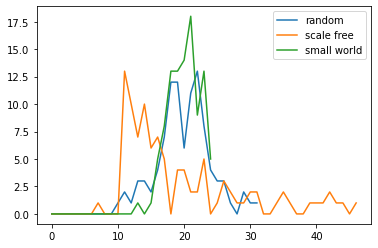

In [ ]:
# Degree distribution
n = 100
k = 20

for i, label in enumerate(ds.graph_type.values):
    da = ds.sel(nb_nodes=n, expected_avg_degree=k)['degree distribution']
    plt.plot(da.values[i], label=label)
plt.legend(loc="upper right")

## Annex

The **`nx.barabasi_albert_graph()`** requires 2 parameters:
- **`n`**: the number of nodes,
- **`m`**: the initial number of connections

For a given number of nodes **`N`** and an expected average degree **`<k>`**, we can determine **`m`** with the following formula: 

$$\begin{align}
    <k> &= \sum_{k=m}^N ip_i                        && \text{average degree formula}\\
    &= \sum_{i=m}^N i \frac{2m(m+1)}{i(i+1)(i+2)}   &&\text{see Barabasi}\\
    &= \sum_{i=m}^N \frac{2m(m+1)}{(i+1)(i+2)} \\
    &= \sum_{i=m}^N \left(\frac{2m(m+1)}{i+1} - \frac{2m(m+1)}{i+2}\right) \\
    &= \sum_{i=m}^N \frac{2m(m+1)}{i+1} - \sum_{i=m}^N \frac{2m(m+1)}{i+2} \\
    &= \sum_{i=m}^N \frac{2m(m+1)}{i+1} - \sum_{j=m+1}^{N+1} \frac{2m(m+1)}{j+1}  &&\text{replacing by } j = i+1 \\
    &= \frac{2m(m+1)}{m+1} - \frac{2m(m+1)}{N+1}    &&\text{simplifying telescoping elements}\\
    &= 2m - \frac{2m(m+1)}{N+1}                     \tag 1 \\
\end{align}$$


  
Hence for a given **`N`** and **`<k>`**, the initial **`m-clique`** are the polynomial root of:

$$\begin{align}
    \frac{2}{N+1} &m^2 + \left(\frac{2}{N+1} -2 \right)m + k = 0 && \text{(using }k \text{ instead of } <k> \text{)} \\
    \Rightarrow &m = \frac{N}{2} \pm \frac{\sqrt{N^2 - 2Nk - 2k}}{2}  \\
    \Rightarrow &m = \frac{N}{2} - \frac{\sqrt{N^2 - 2Nk - 2k}}{2} &&\text{since } m \le N \tag 2\\
\end{align}$$


<br>  
But working with real numbers also implies:

$$\begin{align}
    0 &\le N^2 - 2Nk - 2k \\
    \Rightarrow k &\le \frac{N^2}{2(N+1)}  \tag 3\\
\end{align}$$